СПОСОБЫ ПЕРЕДАЧИ АРГУМЕНТОВ В PYTHON

В предыдущем юните мы создали функцию root, которую вы затем доработали, чтобы она автоматически считала квадратный корень. Вот она:

In [1]:
def root(value, n=2):
    result = value ** (1/n)
    return result

Эта функция написана так, что она возвращает результат в исходный код основного скрипта. Давайте сделаем её более «разговорчивой»: пусть функция печатает на экран, какие действия она выполнила, если мы укажем ей в качестве параметра слово verbose (от англ. «подробный», «многословный») со значением True. Чаще всего такой функционал будет излишним, поэтому зададим этому параметру значение по умолчанию False. Получим такую функцию:

In [2]:
def root(value, n=2, verbose=False):
    result = value ** (1/n)
    if verbose:
        # Аргументы в функции print,
        # перечисленные через запятую,
        # печатаются через пробел
        print('Root of power', n, 'from',
            value, 'equals', result)
    return result

In [3]:
# Посчитаем корень из 25 с аргументами по умолчанию
print(root(25))
# Будет напечатано:
# 5.0
 
# Посчитаем кубический корень из 27 с verbose по умолчанию
print(root(27, 3))
# Будет напечатано:
# 3.0
 
#Посчитаем кубический корень из 27 с verbose=True
print(root(27, 3, True))

5.0
3.0
Root of power 3 from 27 equals 3.0
3.0


Поведение функции выглядит совершенно ожидаемым: когда мы передали аргумент verbose=True, функция подробно напечатала результат выполнения.

?
А что делать, если мы хотим поменять только аргумент verbose, а степень корня оставить по умолчанию? 

Достаточно при передаче аргументов указать название того параметра, которому мы хотим присвоить значение, и передать это значение через = (равно) вот так:

In [4]:
print(root(25, verbose=True))

Root of power 2 from 25 equals 5.0
5.0


Только что мы применили второй способ передачи аргументов — по ключевым словам. Такие аргументы называются именованными, поскольку мы можем написать имя аргумента и присвоить ему значение.

 На самом деле, мы сейчас использовали оба способа передачи аргументов: по порядку, так как функция root ожидает на первом месте получить аргумент value, и по ключевым словам. 

Теперь необходимо уточнить, в каком порядке необходимо сочетать порядковые и именованные аргументы.

Важно сначала передавать порядковые и только затем именованные аргументы.

Посмотрим, что будет, если передать в функцию сначала именованные аргументы и только потом value, который в данном случае является порядковым:

In [5]:
print(root(verbose=True, 25))

SyntaxError: ignored

Интерпретатор сообщил нам об ошибке. Её текст переводится так: «Синтаксическая ошибка: позиционный аргумент следует после именованного аргумента».

→ Запомните эту особенность передачи аргументов! 

?
Можно ли менять местами именованные аргументы?

Да, можно. Давайте так и сделаем:

In [10]:
# Подробно считаем корень степени 4 из 81
print(root(81, verbose=True, n=4))

Root of power 4 from 81 equals 3.0
3.0


Как видите, порядок именованных аргументов никак не повлиял на работу программы. 

Есть небольшое исключение: можно записать порядковый аргумент после именованных, но для этого необходимо подать его в виде именованного — с помощью знака «равно». Вот так:

In [11]:
# Написали value=81 после именованных:
print(root(verbose=True, n=4, value=81))

Root of power 4 from 81 equals 3.0
3.0


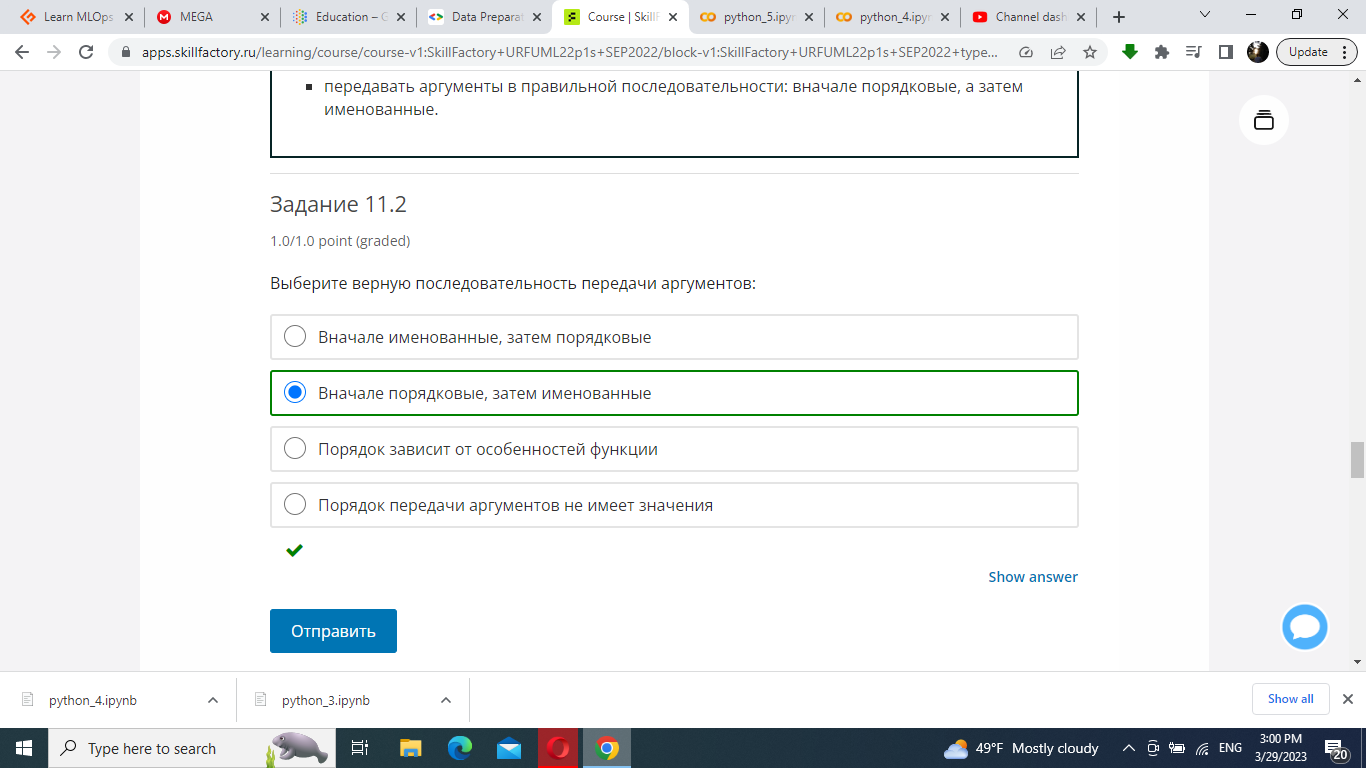

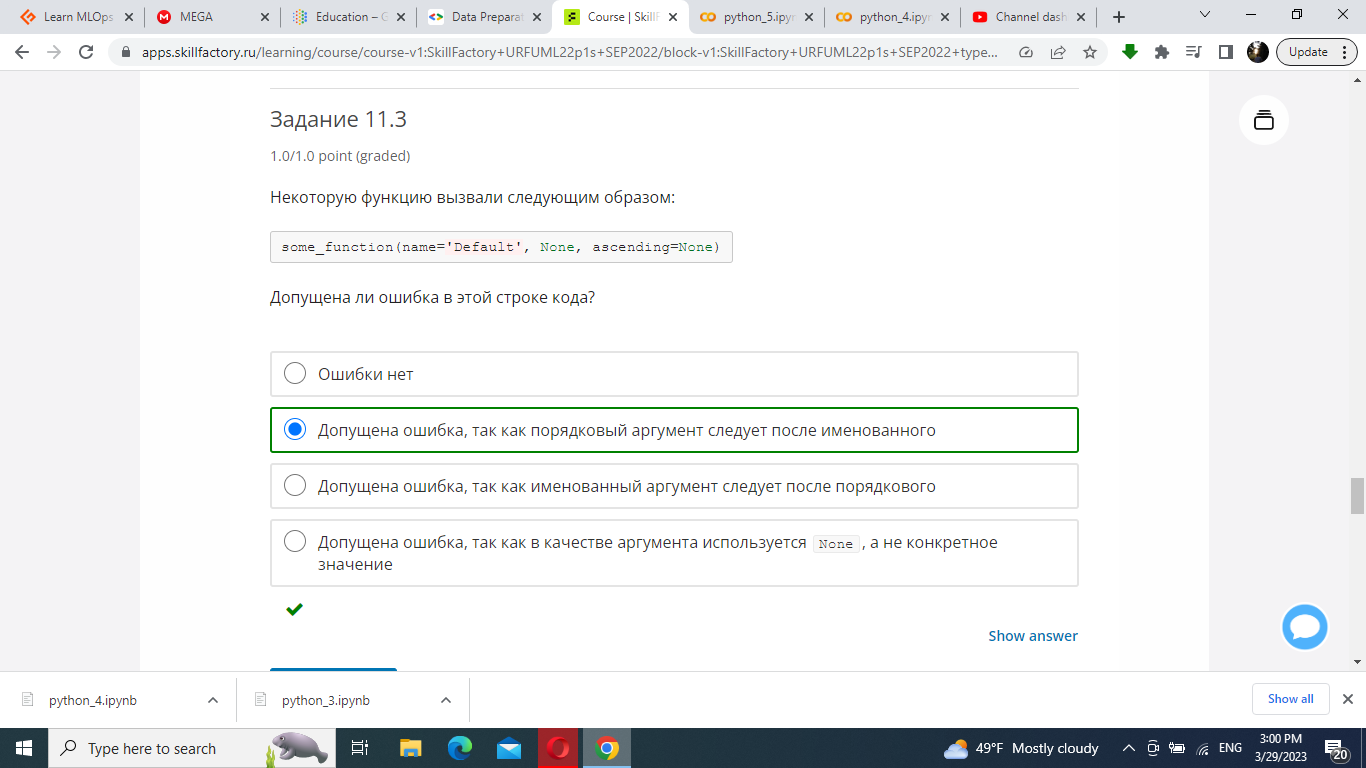

ОБРАБОТКА НЕИЗВЕСТНОГО ЗАРАНЕЕ ЧИСЛА АРГУМЕНТОВ В PYTHON

?
Как же функция print понимает, сколько аргументов ей передали на печать?

Сейчас мы напишем функцию, которая принимает неизвестное заранее число аргументов для обработки, чтобы вы тоже научились создавать подобные функции.

Пусть функция mean (от англ. mean — «среднее значение») принимает на вход неограниченное количество чисел через запятую, а в конце возвращает их среднее значение. Она выглядит вот так:

In [12]:
# В массив args будут записаны все переданные
# порядковые аргументы
def mean(*args):
    # Среднее значение — это сумма всех значений,
    # делённая на число этих значений
    # Функция sum — встроенная, она возвращает
    # сумму чисел
    result = sum(args) / len(args)
    return result
 
# Передадим аргументы в функцию через запятую,
# чтобы посчитать их среднее
print(mean(5,4,4,3))

4.0


Только что вы увидели в аргументах запись *args. Здесь * — это не символ умножения, а оператор распаковки. Все порядковые аргументы будут записаны в переменную args. Args — это принятое в Python обозначение для порядковых аргументов, однако можно называть эту переменную любым другим подходящим образом. Например, конкретно для функции mean логично переименовать переменную args в numbers (от англ. «числа»):

In [13]:
def mean(*numbers):
    result = sum(numbers) / len(numbers)
    return result
 
print(mean(5,4,4,3))

4.0


Как видите, от переименования аргумента поведение функции не изменилось и ошибки не возникло. 

?
Какой же тип данных скрывается за объектом numbers в теле функции?

Это кортеж (tuple):

In [14]:
def mean(*numbers):
    # С помощью встроенной функции isinstance
    # проверим, что numbers — это tuple
    print(isinstance(numbers, tuple))
    # Напечатаем содержимое объекта numbers
    print(numbers)
    result = sum(numbers) / len(numbers)
    return result
 
print(mean(5,4,4,3))

True
(5, 4, 4, 3)
4.0


Необязательно записывать все порядковые аргументы через * в args. Пусть функция mean_mark теперь печатает среднюю оценку для конкретного студента:

In [15]:
# В качестве первого аргумента принимаем фамилию
# студента, а затем уже его оценки через запятую
def mean_mark(name, *marks):
    result = sum(marks) / len(marks)
    # Не возвращаем результат, а печатаем его
    print(name+':', result)
 
mean_mark("Ivanov", 5, 5, 5, 4)
mean_mark("Petrov", 5, 3, 5, 4)

Ivanov: 4.75
Petrov: 4.25


Как видите, первый аргумент мы заняли под строковое значение — имя студента, а дальнейшие аргументы записали уже в marks.

После аргументов, записанных через *args, не могут идти другие порядковые аргументы:

In [16]:
# Поменяем местами *marks, name
def mean_mark_wrong(*marks, name):
    result = sum(marks) / len(marks)
    print(name+':', result)
 
mean_mark_wrong(5, 5, 5, 4, "Ivanov")

TypeError: ignored

Возникла ошибка. Она переводится так: «Ошибка типов: в функции mean_mark_wrong отсутствует один обязательный аргумент 'name', который можно передать только через ключевые слова». Это означает, что аргумент name автоматически стал именованным. К тому же он является обязательным, поскольку не имеет значения по умолчанию.

Передать фамилию студента при таком порядке аргументов можно только вот так:

In [17]:
# Воспользуемся названием name, чтобы передать фамилию
# в этот аргумент
mean_mark_wrong(5, 5, 5, 4, name="Ivanov")

Ivanov: 4.75


Напишите функцию mult, которая считает произведение переданных в неё чисел через запятую.

Особое указание: посчитайте результат с использованием цикла for.

После создания функции воспользуйтесь следующим кодом для самопроверки:

In [18]:
def mult(*args):
    result = 1
    for num in args:
        result *= num
    return result

In [19]:
print(mult(3,5,10))

150


→ Оператор распаковки * можно использовать и для передачи значений из списка в функцию.

Рассмотрим эту возможность на примере функции print. У нас есть список:

In [20]:
langs = ['Python', 'SQL', 'Machine Learning', 'Statistics']

Напечатаем его разными способами. Самый простой:

In [21]:
print(langs)

['Python', 'SQL', 'Machine Learning', 'Statistics']


В данном случае список был напечатан с характерными для него квадратными скобками на границах и кавычками у строк. Так список превращается в строку по умолчанию.

Чтобы напечатать слова в списке langs через пробел, достаточно в функции print перед langs поставить * как оператор распаковки:

In [22]:
print(*langs)

Python SQL Machine Learning Statistics


ЗАДАНИЕ 12.2 (НА САМОПРОВЕРКУ)

Напечатайте список langs с использованием *, как в примере выше, но через запятую с пробелом.

In [23]:
print(*langs, sep=', ')

Python, SQL, Machine Learning, Statistics


Создайте список оценок студента:

marks = [4,5,5,5,5,3,4,4,5,4,5]
Передайте в функцию mean_mark, которая была создана в начале данного подраздела юнита, этот список, а также фамилию студента Kuznetsov с помощью оператора распаковки.

Функция mean_mark продублирована:

In [24]:
def mean_mark(name, *marks):
    result = sum(marks) / len(marks)
    # Не возвращаем результат, а печатаем его
    print(name+':', result)

In [25]:
marks = [4,5,5,5,5,3,4,4,5,4,5] 
mean_mark('Kuznetsov', *marks)

Kuznetsov: 4.454545454545454


олько что мы разобрались с передачей переменного числа порядковых аргументов.

Оказывается, можно передавать разное число именованных аргументов с помощью ещё одного оператора распаковки — двух звёздочек подряд (**).

Переменная kwargs — стандартное название для совокупности именованных аргументов в Python (сокр. от англ. keyword arguments — «именованные аргументы»).

Однако вместо kwargs можно использовать любое другое адекватное название переменной.

Напишем функцию schedule, которая будет печатать расписание по дням. Для начала узнаем, что будет храниться в переменной kwargs после использования оператора **:

In [26]:
# В переменную kwargs будут записаны все
# именованные аргументы
def schedule(**kwargs):
    # kwargs — это словарь, проверим это с помощью isinstance:
    print(isinstance(kwargs, dict))
    # Напечатаем объект kwargs
    print(kwargs)

In [27]:
schedule(monday='Python', tuesday='SQL', friday='ML')

True
{'monday': 'Python', 'tuesday': 'SQL', 'friday': 'ML'}


Итак, kwargs является словарём, в котором ключами являются имена аргументов, а значениями — переданные аргументам значения.

Следует понимать, что всё-таки изначально в функцию передаётся не словарь: те объекты, которые могли бы быть ключами словаря (например, числа), при передаче в качестве названия аргумента вызовут ошибку:

In [28]:
schedule(monday='Python', tuesday='SQL', 5='ML')

SyntaxError: ignored

Эта ошибка переводится так: «Синтаксическая ошибка: ключевое слово не может быть выражением». То есть ключевое слово должно удовлетворять тем же требованиям, что и переменные. 

Обращаться к значениям в kwargs можно так же, как и к значениям в обычном словаре. Расширим функцию schedule так, чтобы она более презентабельно печатала переданные значения:

In [29]:
def schedule(**kwargs):
    print("Week schedule:")
    for key in kwargs:
        print(key, kwargs[key], sep=' - ')
 
schedule(monday='Python', tuesday='SQL', friday='ML')

Week schedule:
monday - Python
tuesday - SQL
friday - ML


С помощью оператора ** можно передавать в функцию нескольких аргументов. Он используется для передачи именованных аргументов с помощью словаря, который в дальнейшем будет распакован. Кроме того, оператор ** является оператором распаковки, только для словарей. Ключами словаря выступают названия аргументов, а значениями — те значения аргументов, которые должны быть им присвоены.

In [30]:
lessons = {
    'Wednesday': 'Maths',
    'Thursday': 'SQL',
    'Friday': 'Statistics'
}
# Использовали оператор ** для распаковки словаря в набор
# значений именованных аргументов
schedule(**lessons)

Week schedule:
Wednesday - Maths
Thursday - SQL
Friday - Statistics


In [31]:
def schedule(**kwargs):
    print("Week schedule:")
    for key in kwargs:
        print(key, kwargs[key], sep=' - ')
 
schedule( name='Ivanov', age=19, city='Moscow')

Week schedule:
name - Ivanov
age - 19
city - Moscow


In [32]:
def schedule(*kwargs):
    print("Week schedule:")
    for key in kwargs:
        print(key, kwargs[key], sep=' - ')
 
schedule(monday='Python', tuesday='SQL', friday='ML')

TypeError: ignored

Вот функция, которая просто печатает все переданные в неё аргументы:

In [33]:
def print_args(*args, **kwargs):
    print(args)
    print(kwargs)
 
print_args(1,4,5,7, name='Ivanov', age=19, city='Moscow')

(1, 4, 5, 7)
{'name': 'Ivanov', 'age': 19, 'city': 'Moscow'}


Также в функцию можно одновременно передавать и порядковые, и именованные аргументы через операторы распаковки.

Напечатаем три списка с помощью print: значения внутри списка разделим запятой, а сами списки — точкой с запятой. Для этого один раз создадим словарь how, в котором будут храниться значения, присваиваемые в дальнейшем аргументам sep и end.

Когда мы распакуем словарь в print, поведение функции будет аналогично тому, что мы бы получили при использовании функции print в виде:

In [34]:
list1 = [1,4,6,8]
list2 = [12, 45, 56, 190, 111]
list3 = ['Python', 'Functions']
 
# Один раз запишем в словарь параметры для печати
# через print: разделитель — запятая,
# окончание строки — точка с запятой
how = {'sep': ', ', 'end': '; '}
 
# Распаковываем и список, и словарь how
print(*list1, **how)
print(*list2, **how)
print(*list3, **how)
 


1, 4, 6, 8; 12, 45, 56, 190, 111; Python, Functions; 

In [35]:
print(*list1, sep=', ', end='; ')

1, 4, 6, 8; 

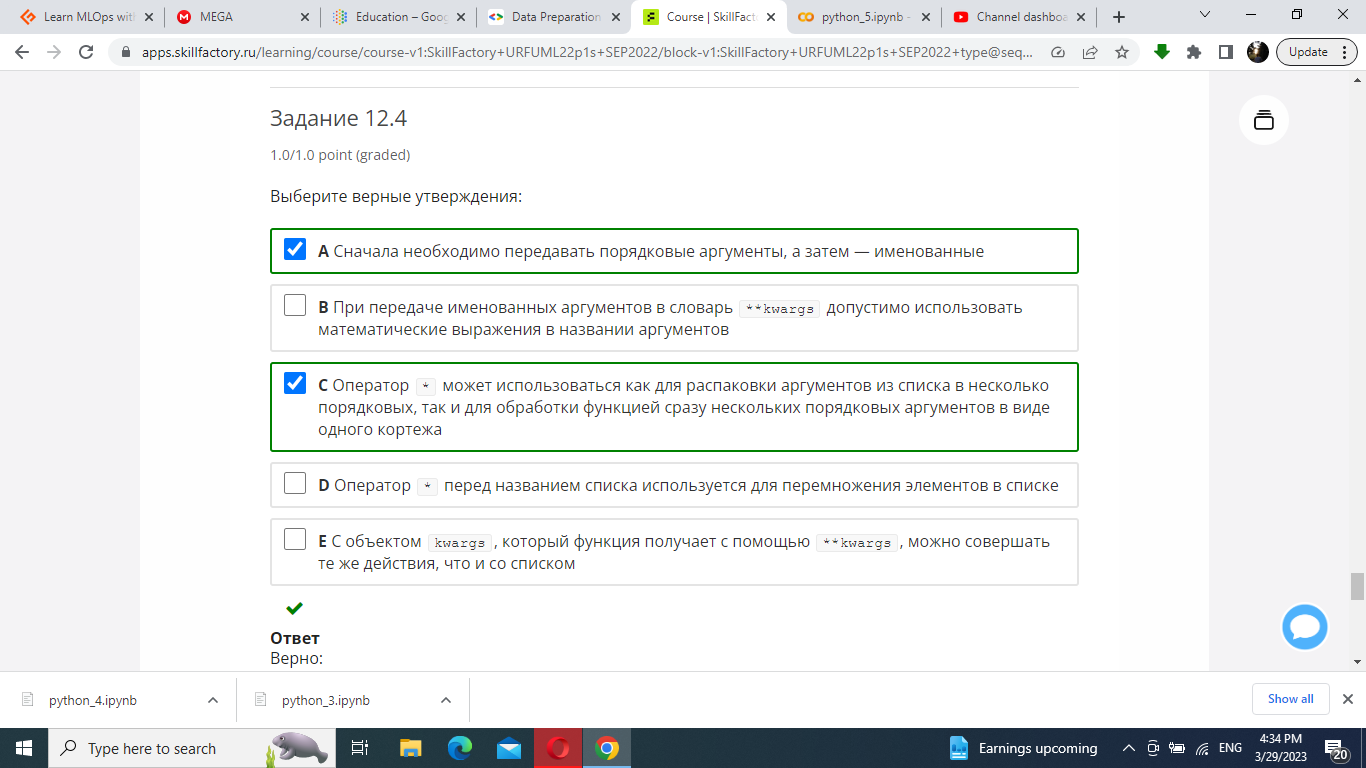

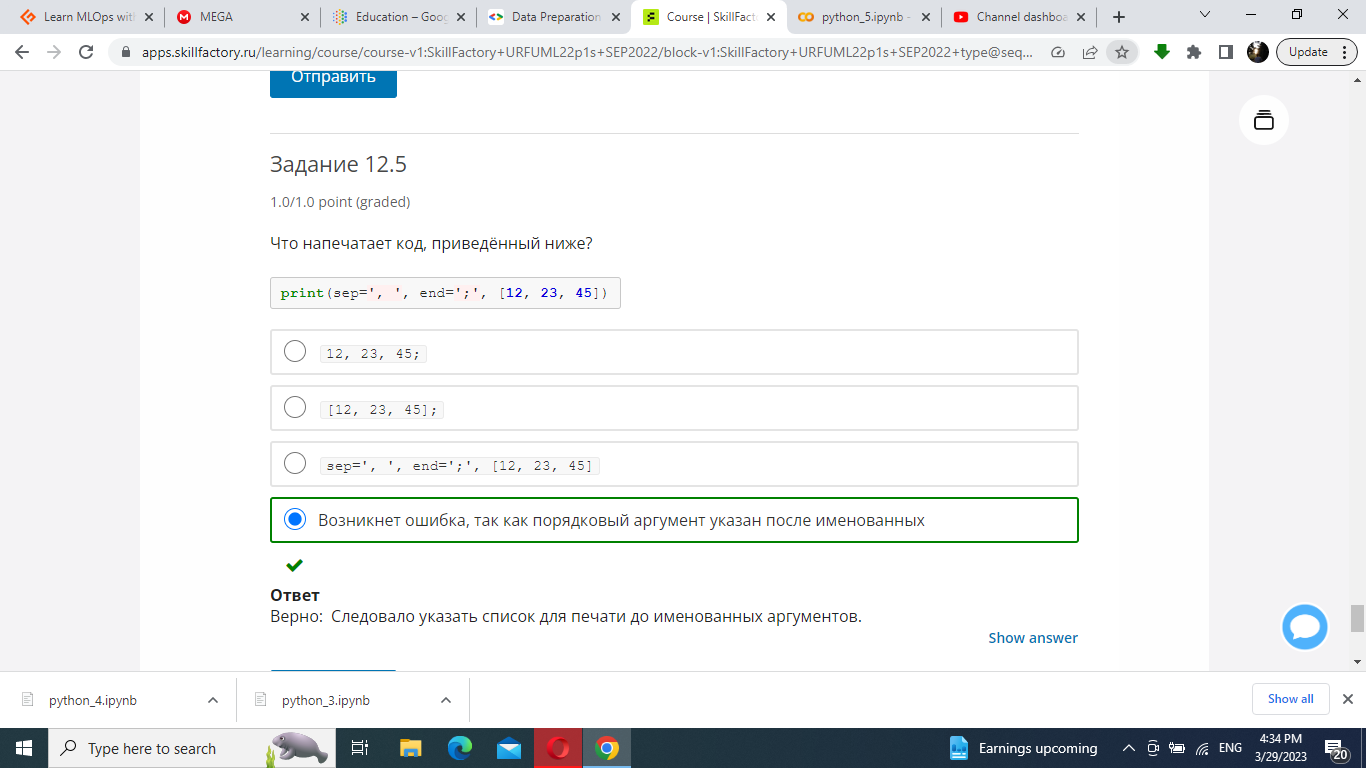

ОБЛАСТЬ ВИДИМОСТИ ФУНКЦИЙ

→ Вначале разберёмся, как устроены функции, которые содержат внутри себя другие функции.

Нередко вложенные функции используются для некоторых промежуточных вычислений: например, внутри функции, которая выводит на экран график, содержится функция, которая вычисляет параметры этого графика (размер, соотношение сторон и прочее).

Создадим функцию print_root(), которая будет печатать корень степени n (по умолчанию n = 2, то есть вычисляется квадратный корень) из числа value. Внутри себя она будет содержать другую функцию root(), которая будет вычислять корень степени n из числа value. Напомним, корень степени n из числа — это число в степени 1/n.

In [36]:
# Зададим внешнюю функцию
def print_root(value, n=2):
    # Зададим внутреннюю функцию
    # Она будет являться вспомогательной
    def root_(value, n=2):
        result = value ** (1/n)
        return result
    # Получим результат из внутренней функции
    res = root(value, n)
    # Печатаем результат и не возвращаем его
    print('Root of power', n, 'from', value, 'equals', res)

In [37]:
print_root(81, 4)

Root of power 4 from 81 equals 3.0


Как видите, функция сработала без ошибок, а на экране появился результат извлечения корня из числа. 

Что произошло в коде выше?
Попробуем обратиться непосредственно к функции root:

In [38]:
print(root_(81, 4))

NameError: ignored

Дело в том, что функция print_root скрывает, инкапсулирует, защищает (инкапсулирует) доступ ко внутренним функциям из основного скрипта, поэтому интерпретатор не может найти эту функцию, а функция root остаётся только для внутреннего использования.

Более того, данное ограничение относится не только ко внутренней функции root(), но и ко всем переменным, объявленным внутри функции print_root().

Например, если мы попробуем обратиться к значению переменной res, которая была объявлена внутри функции print_root(), мы также получим ошибку:

In [39]:
print(res)

NameError: ignored

✍ Итак, сделаем небольшой промежуточный вывод.

В Python существует «право на владение объектом» — функцией/переменной. Если функция/переменная находится в теле некоторой функции, обратиться к ней можно не из каждой точки программы. Чтобы более детально разобраться в этом вопросе, нам нужно привести классификацию переменных и познакомиться с важным термином — разрешение переменных.

РАЗРЕШЕНИЕ ПЕРЕМЕННЫХ

→ Начнём с примера рабочей задачи.

Мы занимаемся регистрацией данных о сотрудниках нашей компании в базе. Внесение в базу будем имитировать выводом информации на экран. Поля для ввода — имя и фамилия сотрудника. На экран должны быть выведены полное имя сотрудника (имя и фамилия) и название компании.

Создадим функцию register_employee() с аргументами name и surname (имя и фамилия сотрудника). Функция ничего не возвращает — просто выводит на экран фразу 'Employee {} is registered with the company {}', где вместо {} подставляется полное имя сотрудника (фамилия и имя) и название компании. Название компании хранится в переменной company_name, которая объявлена в основной части программы.

Внутри функции register_employee() объявим другую функцию — create_full_name(). Она возвращает полное имя сотрудника — результат сложения (конкатенации) строк с именем и фамилией:

In [40]:
#объявляем внешнюю функцию для регистрации сотрудников
def register_employee(name, surname):
    #объявляем функцию для промежуточных вычислений
    def create_full_name():
        #функция использует внешние переменные name и surname
        sep = ' ' #разделитель между именем и фамилией
        result = name + sep + surname #вычисляем полное имя
        return result
    full_name = create_full_name() #вызываем внутреннюю функцию
    #выводим результат на экран, используя внешнюю переменную company_name
    print('Employee {} is registered with the company {}'.format(full_name, company_name))
    
company_name = 'TheBlindMice' #название компании
register_employee('John','Doe') #вызов функции


Employee John Doe is registered with the company TheBlindMice


Отлично, наша функция работает! А значит, нам пора переходить к важной терминологии.

Процесс поиска интерпретатором объекта, который скрывается за названием переменной, называется разрешением.

Например, в функции register_employee() мы обращаемся к переменной company_name, однако данная переменная была объявлена за пределами функции. То, как интерпретатор понимает, что за переменной company_name скрывается строка 'TheBlindMice', и называется разрешением.

В Python существует четыре типа переменных в зависимости от их видимости. Их разрешение будет идти от пункта 1 до пункта 4. Для любого разработчика очень важно понимать различия между ними, чтобы не сделать множество ошибок в попытках использовать переменные, которые использовать нельзя.

В нашем учебном примере о регистрации сотрудников мы специально использовали все типы переменных. Давайте разбираться, что есть что:

1
Локальные переменные (local) — это переменные, которые были объявлены в функции и используются непосредственно в ней. В разряд локальных переменных также входят аргументы функции.

Аргументы функции register_employee(), name и surname, являются локальными переменными по отношению к этой функции.
Функция create_full_name() является локальной для функции register_employee(). Попытка вызвать её из основной части программы приведёт к ошибке, которую мы уже видели раньше.
Переменные sep и result являются локальными по отношению к функции create_full_name(). Они является невидимыми для функции register_employee() и для основной части программы.
Переменная full_name, в которую заносится результат работы функции create_full_name(), является локальной переменной функции register_employee().
2
Нелокальные переменные (nonlocal) — это переменные, которые были объявлены во внешней функции относительно рассматриваемой функции.

Переменные name и surname являются нелокальными по отношению к функции create_full_name(). Они объявлены во внешней функции и используются во внутренней.
3
Глобальные переменные (global) — это переменные, которые были объявлены непосредственно в в основном блоке программы (вне функций).

Переменная company_name объявлена в основной части программы (вне функции) и является глобальной.
Обратите внимание, что она задана после объявления функции. Ошибки не возникает, потому что код выполняется построчно, а значит сначала создаётся переменная company_name, а затем она уже используется в вызове функции  register_employee(). Если бы мы поменяли вызов функции и объявление переменной местами, получили бы ошибку.

4
Встроенные переменные (built-in) — это переменные и объекты, которые встроены в функционал Python изначально. Например, к ним относятся функции print, len, структуры данных list, dict, tuple и другие. В большинстве IDE, таких как PyCharm, VS Code и Jupyter, имена таких переменных подсвечиваются специальным цветом.

Функция print() является встроенной функцией Python. К ней можно обращаться из любой части программы.

Лучший способ учиться — учиться на ошибках. Рассмотрим различия между типами переменных, некорректно обращаясь к ним.

?
Например, что будет, если мы попробуем обратиться к переменной result во внешней функции?

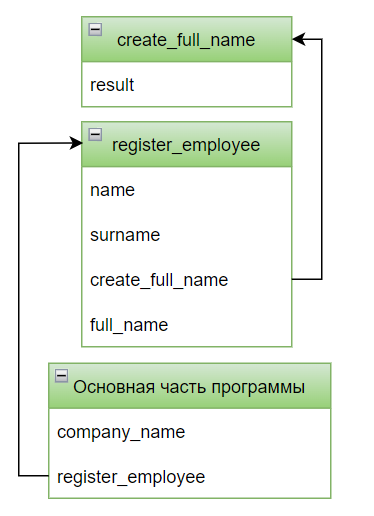

In [41]:
def register_employee(name, surname):
    #name и surname — локальные переменные register_employee
    def create_full_name():
        #sep — локальная переменная для create_full_name
        sep = ' ' 
        #name, surname — нелокальные переменные для create_full_name
        #result — локальная переменная create_full_name
        result = name + sep + surname
        return result
    #full_name — локальная переменная register_employee
    full_name = create_full_name()
    #пытаемся обратиться к result из основной части программы
    print(result)
    print('Employee {} is registered with the company {}'.format(full_name, company_name))

#company_name — глобальная переменная       
company_name = 'TheBlindMice'
#вызов функции
register_employee('Jone','Doe')

NameError: ignored

Мы получим ошибку, которая говорит о том, что переменная result не объявлена в функции register_employee(). Так произошло потому, что функция register_employee() ничего не знает о переменной result, так как она является локальной для функции create_full_name().  На языке нашей схемы: мы попытались пригласить на второй этаж жителя с третьего этажа, что противоречит правилам.

Такую же ошибку мы получим, если попробуем обратиться к переменной full_name из основной части программы:

In [42]:
def register_employee(name, surname):
    #name и surname — локальные переменные register_employee
    def create_full_name():
        #sep — локальная переменная для create_full_name
        sep = ' ' 
        #name, surname — нелокальные переменные для create_full_name
        #result — локальная переменная create_full_name
        result = name + sep + surname
        return result
    #full_name — локальная переменная register_employee
    full_name = create_full_name()
    print('Employee {} is registered with the company {}'.format(full_name, company_name))

#company_name — глобальная переменная    
company_name = 'TheBlindMice' 
#вызов функции
register_employee('Jone','Doe') 
#пытаемся обратиться к full_name из основной части программы
print(full_name)

Employee Jone Doe is registered with the company TheBlindMice


NameError: ignored

Снова получаем ошибку, так как full_name — локальная переменная для функции register_employee(), и основная часть программы о ней ничего не знает. На языке нашей схемы: мы пытаемся пригласить на первый этаж жителя со второго этажа, что является невозможным.

→  Есть еще одно очень важное ограничение: если в коде функции происходит переопределение глобальной или нелокальной переменной, то необходимо показать, что та или иная переменная является глобальной или нелокальной.

Например, если внутри тела функции происходит увеличение/уменьшение глобальной переменной с помощью операторов +=/-=, то такое изменение значение глобальной переменной вызовет ошибку. 

Если руководствоваться аналогией с нашей многоэтажкой: приглашая жителя снизу, мы не можем переодеть его, явно не спросив об этом.

Рассмотрим это ограничение на примере.

Пусть у нас есть переменная global_counter, в которой мы храним количество, например, количество товаров на складе. Когда товар поступает на склад, мы увеличиваем его количество на 1.

Для этого напишем функцию add_one(), которая увеличивает значение глобальной переменной global_counter на 1, вызовем её и попробуем посмотреть на значение переменной.

 Напишем функцию, которая увеличивает значение глобальной переменной на 1:

In [43]:
# Создадим глобальную переменную
# и приравняем её нулю
global_counter = 0
 
# Создадим функцию, которая прибавляет 1
# к переменной global_counter
def add_one():
    global_counter += 1
 
# Запустим функцию add_one
add_one()
# Напечатаем значение переменной global_counter
print(global_counter)

UnboundLocalError: ignored

Перевод ошибки: «К локальной переменной 'global_counter' обратились до объявления переменной в коде». Это означает, что интерпретатор считает эту переменную локальной, хотя в основной части программы есть одноимённая переменная.

?
Но в чём проблема? В предыдущем примере мы спокойно использовали значение глобальной переменной company_name в теле функции, а сейчас возникает ошибка.

Ответ следующий: это специальный механизм защиты глобальных переменных в Python. Когда мы пытаемся перезаписать (изменить) значение глобальной переменной, она является для нас недоступной. 

?
Как именно возникает такая ошибка?

Присмотримся повнимательнее к операции присваивания. Слева от оператора присваивания (=) стоит переменная global_counter. Когда выполняется операция присваивания, в памяти выделяется место для новой локальной переменной global_counter. Однако её значение ещё не было задано — было выделено только место для хранения, но само содержимое «не привезли».

Эта же переменная стоит и справа от оператора присваивания(=): global_counter = global_counter + 1. Когда мы обращаемся к переменной global_counter справа, то global_counter считается в этот момент уже локальной, а не глобальной (и, напомним, её значение ещё не было задано). Возникает противоречие: мы пытаемся обратиться к переменной, значение которой ещё не было определено. Отсюда и возникает ошибка UnboundLocalError.

Зачем нужна такая защита?
Важное замечание: стандарты разработки на Python не рекомендуют изменять в функциях глобальные переменные, однако такая возможность предусмотрена. Для этого необходимо добавить оператор global внутри функции перед той переменной, которую вы хотите изменить глобально.

В данном случае, чтобы изменить переменную на глобальном уровне, нам необходимо добавить строку global global_counter:

In [44]:
global_counter = 0
 
def add_one():
    # Обозначим, что переменная global_counter
    # является глобальной
    global global_counter
    global_counter += 1
 
add_one()
print(global_counter)
 
# Будет напечатано:
# 1

1


Теперь функция сработала без ошибок, а переменная global_counter увеличилась на 1 в глобальном смысле.

Аналогичного поведения следует ожидать от вложенных функций и нелокальных переменных.

Например, создадим функцию inner_function(), которая использует переменную enclosing_counter, созданную во внешней функции outer_function(). Она также должна увеличить значение этой переменной на 1 и сразу напечатать её значение. Всё, как в прошлой задаче, но теперь переменная является нелокальной.

In [45]:
# Внешняя функция
def outer_function():
    # Создадим переменную, относящуюся к внешней функции
    enclosing_counter = 0
    # Внутренняя функция
    def inner_function():
        # Прибавим 1 к enclosing_counter
        enclosing_counter += 1
        # Напечатаем значение enclosing_counter
        print(enclosing_counter)
    # Запустим внутреннюю функцию из внешней
    inner_function()
 
# Запустим внешнюю функцию
outer_function()

UnboundLocalError: ignored

Как и ожидалось, мы получили ошибку. Причём ошибка того же характера: интерпретатор полагает, что enclosing_counter — это локальная переменная, которая ещё не была объявлена.



In [46]:
def outer_function():
    enclosing_counter = 0
    def inner_function():
        # С помощью оператора nonlocal покажем,
        # что переменная enclosing_counter находится
        # во внешней функции
        nonlocal enclosing_counter
        enclosing_counter += 1
        print(enclosing_counter)
    inner_function()
 
outer_function()
 

1


Теперь ошибка не возникает, а поведение функции оказывается совершенно предсказуемым.

У операции, которую мы только что совершили, есть своё название. В данном случае функция inner_function является функцией-замыканием — она использует в своём коде ссылки на переменные, которые были объявлены во внешней функции, но не в основном коде программы.

→ Итак, мы рассмотрели, как в функциях изменять локальные, нелокальные и глобальные переменные, и дали определение замыканию.

?
Возможно ли изменять встроенные объекты? Например, можно ли присваивать значение переменной с названием len, хотя len изначально используется в Python для подсчёта числа элементов в структуре данных?

Да, возможно. Однако это крайне нежелательно, поскольку теряется доступ к возможностям исходного объекта или функции.

Давайте рассмотрим пример. У нас есть некоторый список my_list, и мы хотим посчитать количество элементов в нём, воспользовавшись встроенной функцией len(). По своей невнимательности мы занесли вычисленный результат в переменную с именем len:

In [47]:
my_list = [1,4,5,7]
# Запишем в переменную с названием
# len длину списка my_list,
# полученную с помощью встроенной функции len
len = len(my_list)
print(len)
# Будет напечат

4


Только что мы сохранили в переменную с названием len число 4. Эта операция сработала без ошибок. Попробуем теперь посчитать длину ещё одного списка в том же скрипте уже после того, как предыдущий код был выполнен:

In [48]:
# Повтор предыдущего кода:
my_list = [1,4,5,7]
# Запишем в переменную с названием
# len длину списка my_list,
# полученную с помощью встроенной функции len
len = len(my_list)
print(len)
# Будет напечатано:
# 4
 
# Попробуем снова воспользоваться функцией len:
# Создадим ещё один список
new_list = ['Ivan', 'Sergej', 'Maria']
# Также узнаем его длину с помощью функции len
length = len(new_list)
print(length)

TypeError: ignored

Перевод ошибки: «Ошибка типов: объект типа 'int (целое число)' нельзя вызвать». Эта ошибка связана с тем, что после запуска первого фрагмента кода в переменной len оказалось число 4 (то есть объекта типа int). В итоге за именем len в программе теперь скрывается число, а не встроенная в Python функция для вычисления длины списка. Из-за этого и возникла описанная ошибка во втором фрагменте кода. Будьте внимательны при написании своих программ.

Распределите переменные функции inner_function по группам.

Что будет выведено в результате выполнения следующего кода?



In [51]:
def print_msg(msg):
    def printer():
        print(msg)
printer('Hello')

NameError: ignored

Вашему коллеге было дано задание написать во внешней функции total_multiplier внутреннюю функцию-замыкание multiplier, которая увеличивает значение переменной total на значение 10 * n, где n — аргумент внешней функции.
Он написал следующий код:

In [52]:
def total_multiplier(n):
    total = 0
    def multiplier():
        product = 10 * n
        total += product
        return total
    return multiplier()

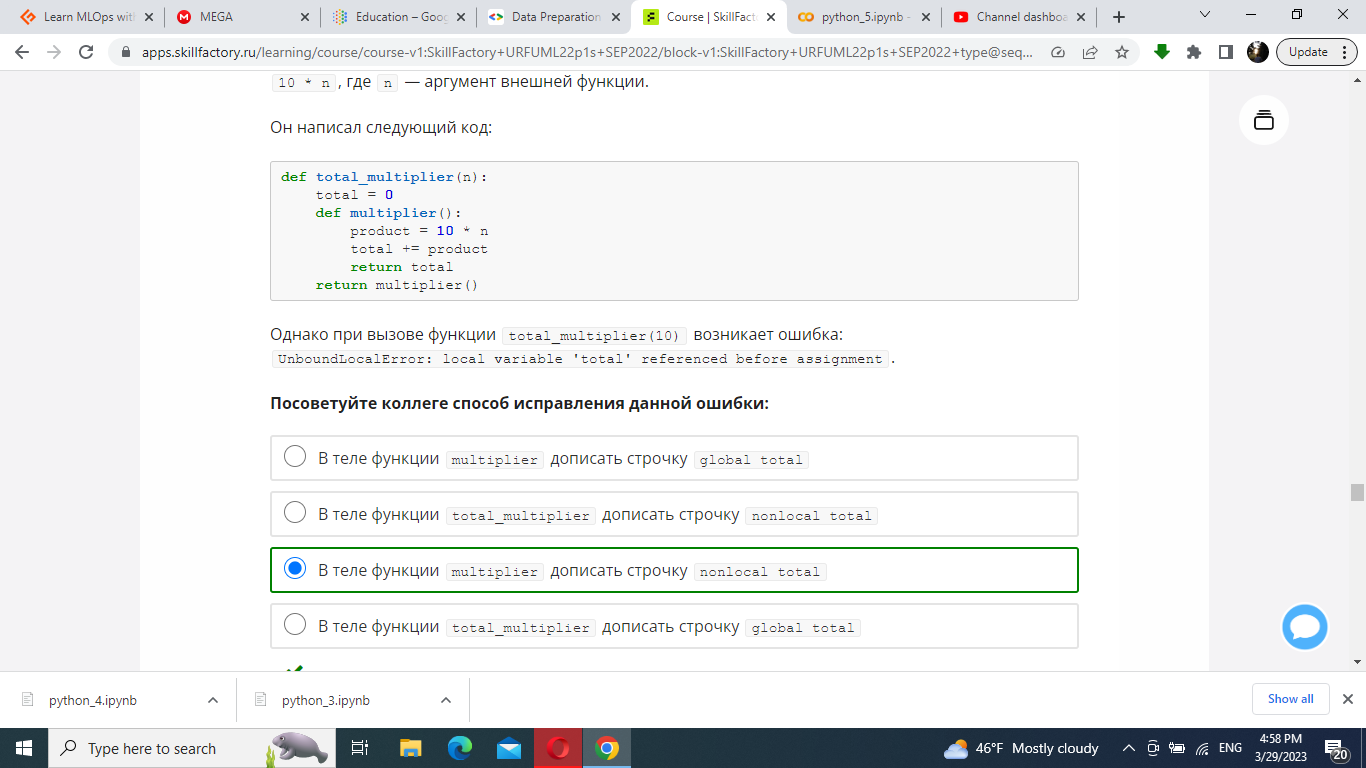

Давайте в теле внешней функции counter() напишем внутреннюю функцию-счётчик add(), которая с каждым запуском будет считать, сколько раз её вызвали. 

Во внешней функции объявим переменную number. Во внутренней функции будем увеличивать значение этой переменной на 1. Обязательно будем использовать оператор nonlocal, чтобы показать, что текущее значение счётчика необходимо брать из внешней функции и оно будет изменяться. Говоря профессиональным языком, мы создаём замыкание.

In [53]:
# Функция, которая создаёт счётчик
def counter():
    # Начальное значение счётчика — 0
    number = 0
    # Функция add будет каждый раз прибавлять
    # к счётчику 1 при запуске
    def add():
        # Сообщаем, что number берём из
        # внешней функции
        nonlocal number
        # Увеличиваем значение счётчика на 1   
        number += 1
        # Возвращаем текущее число запусков счётчика
        return number
    # Возвращаем не результат вычислений,
    # а непосредственно саму функцию add
    # без круглых скобок!
    return add

In [54]:
# В переменную counter1 сохраняем новый счётчик
counter1 = counter()
 
# Проверим, что counter1 действительно является вызываемым объектом,
# то есть функцией. Для этого воспользуемся встроенной функцией
# callable:
print(callable(counter1))

True
